### Data Dictionary

This dataset is about the performance of basketball teams. The __cbb.csv__ data set includes performance data about five seasons of 354 basketball teams. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
|TEAM |	The Division I college basketball school|
|CONF|	The Athletic Conference in which the school participates in (A10 = Atlantic 10, ACC = Atlantic Coast Conference, AE = America East, Amer = American, ASun = ASUN, B10 = Big Ten, B12 = Big 12, BE = Big East, BSky = Big Sky, BSth = Big South, BW = Big West, CAA = Colonial Athletic Association, CUSA = Conference USA, Horz = Horizon League, Ivy = Ivy League, MAAC = Metro Atlantic Athletic Conference, MAC = Mid-American Conference, MEAC = Mid-Eastern Athletic Conference, MVC = Missouri Valley Conference, MWC = Mountain West, NEC = Northeast Conference, OVC = Ohio Valley Conference, P12 = Pac-12, Pat = Patriot League, SB = Sun Belt, SC = Southern Conference, SEC = South Eastern Conference, Slnd = Southland Conference, Sum = Summit League, SWAC = Southwestern Athletic Conference, WAC = Western Athletic Conference, WCC = West Coast Conference)|
|G|	Number of games played|
|W|	Number of games won|
|ADJOE|	Adjusted Offensive Efficiency (An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense)|
|ADJDE|	Adjusted Defensive Efficiency (An estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense)|
|BARTHAG|	Power Rating (Chance of beating an average Division I team)|
|EFG_O|	Effective Field Goal Percentage Shot|
|EFG_D|	Effective Field Goal Percentage Allowed|
|TOR|	Turnover Percentage Allowed (Turnover Rate)|
|TORD|	Turnover Percentage Committed (Steal Rate)|
|ORB|	Offensive Rebound Percentage|
|DRB|	Defensive Rebound Percentage|
|FTR|	Free Throw Rate (How often the given team shoots Free Throws)|
|FTRD|	Free Throw Rate Allowed|
|2P_O|	Two-Point Shooting Percentage|
|2P_D|	Two-Point Shooting Percentage Allowed|
|3P_O|	Three-Point Shooting Percentage|
|3P_D|	Three-Point Shooting Percentage Allowed|
|ADJ_T|	Adjusted Tempo (An estimate of the tempo (possessions per 40 minutes) a team would have against the team that wants to play at an average Division I tempo)|
|WAB|	Wins Above Bubble (The bubble refers to the cut off between making the NCAA March Madness Tournament and not making it)|
|POSTSEASON|	Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)|
|SEED|	Seed in the NCAA March Madness Tournament|
|YEAR|	Season

The final module of this course is a project to determine which basketball teams are most likely to make it to the semifinal round of the College Basketball Tournament known as the Final Four.

You will have access to historical data and will apply different classification algorithms to accomplish this.

Source: NCAA Division I Men's Basketball Tournament 
(https://en.wikipedia.org/wiki/NCAA_Division_I_Men%27s_Basketball_Tournament)

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score, jaccard_score, log_loss

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

from pycaret.classification import *

np.random.seed(123)

pd.options.display.max_columns= None
#pd.options.display.max_rows = None

### Data Exploration

In [2]:
df = pd.read_csv("basketball_train.csv")

In [3]:
df

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,20.6,28.2,29.4,34.1,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,32.1,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,25.2,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,27.9,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,UCLA,P12,36,22,111.8,96.6,0.8425,49.6,48.5,17.6,17.9,33.8,28.6,35.7,32.3,47.4,45.4,36.8,35.6,66.8,0.0,S16,11.0,2015
1753,Utah,P12,34,25,114.9,88.7,0.9513,55.2,43.0,18.2,18.3,31.3,28.4,43.4,34.3,52.3,41.4,40.1,31.2,61.4,3.7,S16,5.0,2015
1754,West Virginia,B12,35,25,110.3,93.3,0.8733,46.1,52.7,18.7,28.0,40.1,31.1,40.4,55.5,45.5,51.8,31.6,36.5,68.6,4.1,S16,5.0,2015
1755,Wichita St.,MVC,34,29,114.3,91.5,0.9277,50.3,45.8,15.0,21.3,34.5,27.4,36.2,36.6,48.9,42.6,35.4,35.3,62.6,4.2,S16,7.0,2015


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TEAM        1757 non-null   object 
 1   CONF        1757 non-null   object 
 2   G           1757 non-null   int64  
 3   W           1757 non-null   int64  
 4   ADJOE       1757 non-null   float64
 5   ADJDE       1757 non-null   float64
 6   BARTHAG     1757 non-null   float64
 7   EFG_O       1757 non-null   float64
 8   EFG_D       1757 non-null   float64
 9   TOR         1757 non-null   float64
 10  TORD        1757 non-null   float64
 11  ORB         1757 non-null   float64
 12  DRB         1757 non-null   float64
 13  FTR         1757 non-null   float64
 14  FTRD        1757 non-null   float64
 15  2P_O        1757 non-null   float64
 16  2P_D        1757 non-null   float64
 17  3P_O        1757 non-null   float64
 18  3P_D        1757 non-null   float64
 19  ADJ_T       1757 non-null  

In [5]:
df.describe(include='all')

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
count,1757,1757,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,340,340.000000,1757.000000
unique,355,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN
top,Yale,ACC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R64,NaN,NaN
freq,5,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160,NaN,NaN
mean,NaN,NaN,31.523051,16.513375,103.542402,103.542459,0.493398,50.120489,50.312806,18.591804,18.521286,29.277120,29.467445,35.097894,35.373307,49.135970,49.298065,34.563517,34.744792,68.422254,-7.837109,NaN,8.791176,2017.002277
std,NaN,NaN,2.602819,6.545571,7.304975,6.472676,0.255291,3.130430,2.859604,1.991637,2.108968,4.101782,3.061786,4.884599,5.900935,3.422136,3.288265,2.742323,2.369727,3.258920,6.988694,NaN,4.674090,1.415419
min,NaN,NaN,24.000000,0.000000,76.700000,84.000000,0.007700,39.400000,39.600000,12.400000,10.200000,15.000000,18.400000,21.600000,21.800000,37.700000,37.700000,25.200000,27.100000,57.200000,-25.200000,NaN,1.000000,2015.000000
25%,NaN,NaN,30.000000,12.000000,98.600000,98.900000,0.283700,48.100000,48.400000,17.200000,17.100000,26.600000,27.300000,31.700000,31.200000,46.900000,47.100000,32.600000,33.100000,66.400000,-13.000000,NaN,5.000000,2016.000000
50%,NaN,NaN,31.000000,16.000000,103.100000,103.800000,0.474000,50.000000,50.300000,18.500000,18.500000,29.400000,29.400000,34.900000,34.900000,49.000000,49.300000,34.600000,34.700000,68.500000,-8.400000,NaN,9.000000,2017.000000
75%,NaN,NaN,33.000000,21.000000,108.100000,108.000000,0.710600,52.100000,52.300000,19.800000,19.900000,31.900000,31.500000,38.300000,39.200000,51.400000,51.500000,36.400000,36.300000,70.400000,-3.100000,NaN,13.000000,2018.000000


In [6]:
df.shape

(1757, 24)

In [7]:
df.columns

Index(['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'POSTSEASON', 'SEED', 'YEAR'],
      dtype='object')

### Data Exploration

In [8]:
df['TEAM'].nunique()

355

In [9]:
df['POSTSEASON'].value_counts()

R64          160
R32           80
S16           40
R68           20
E8            20
F4            10
2ND            5
Champions      5
Name: POSTSEASON, dtype: int64

In [10]:
df['YEAR'].value_counts()

2019    353
2018    351
2017    351
2016    351
2015    351
Name: YEAR, dtype: int64

### Data Visualization

### Univariate Data Exploration

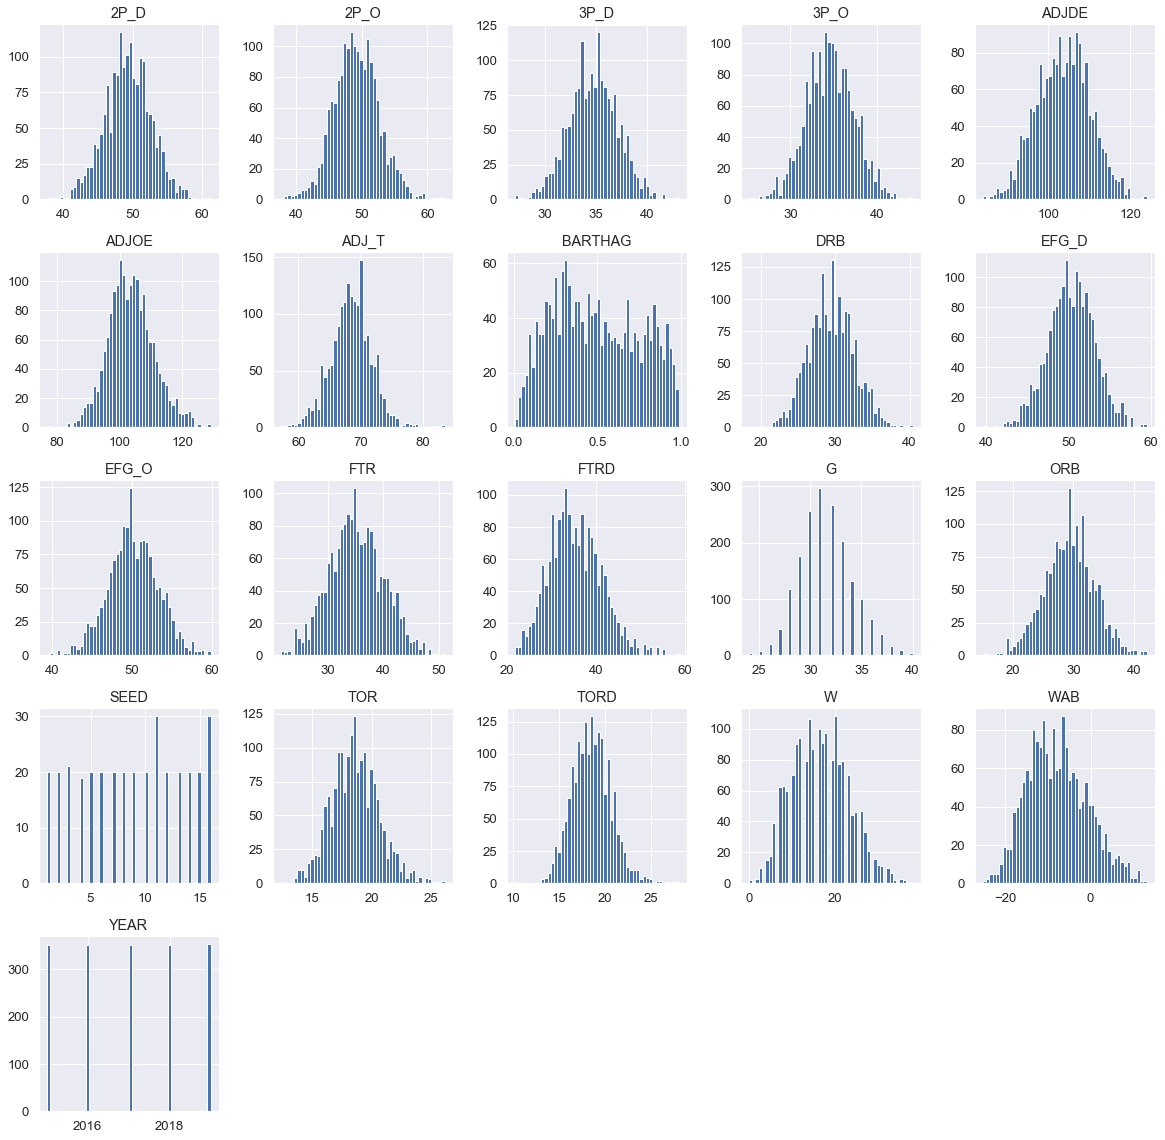

In [11]:
df.hist(bins=50, figsize=(20,20))
plt.show()

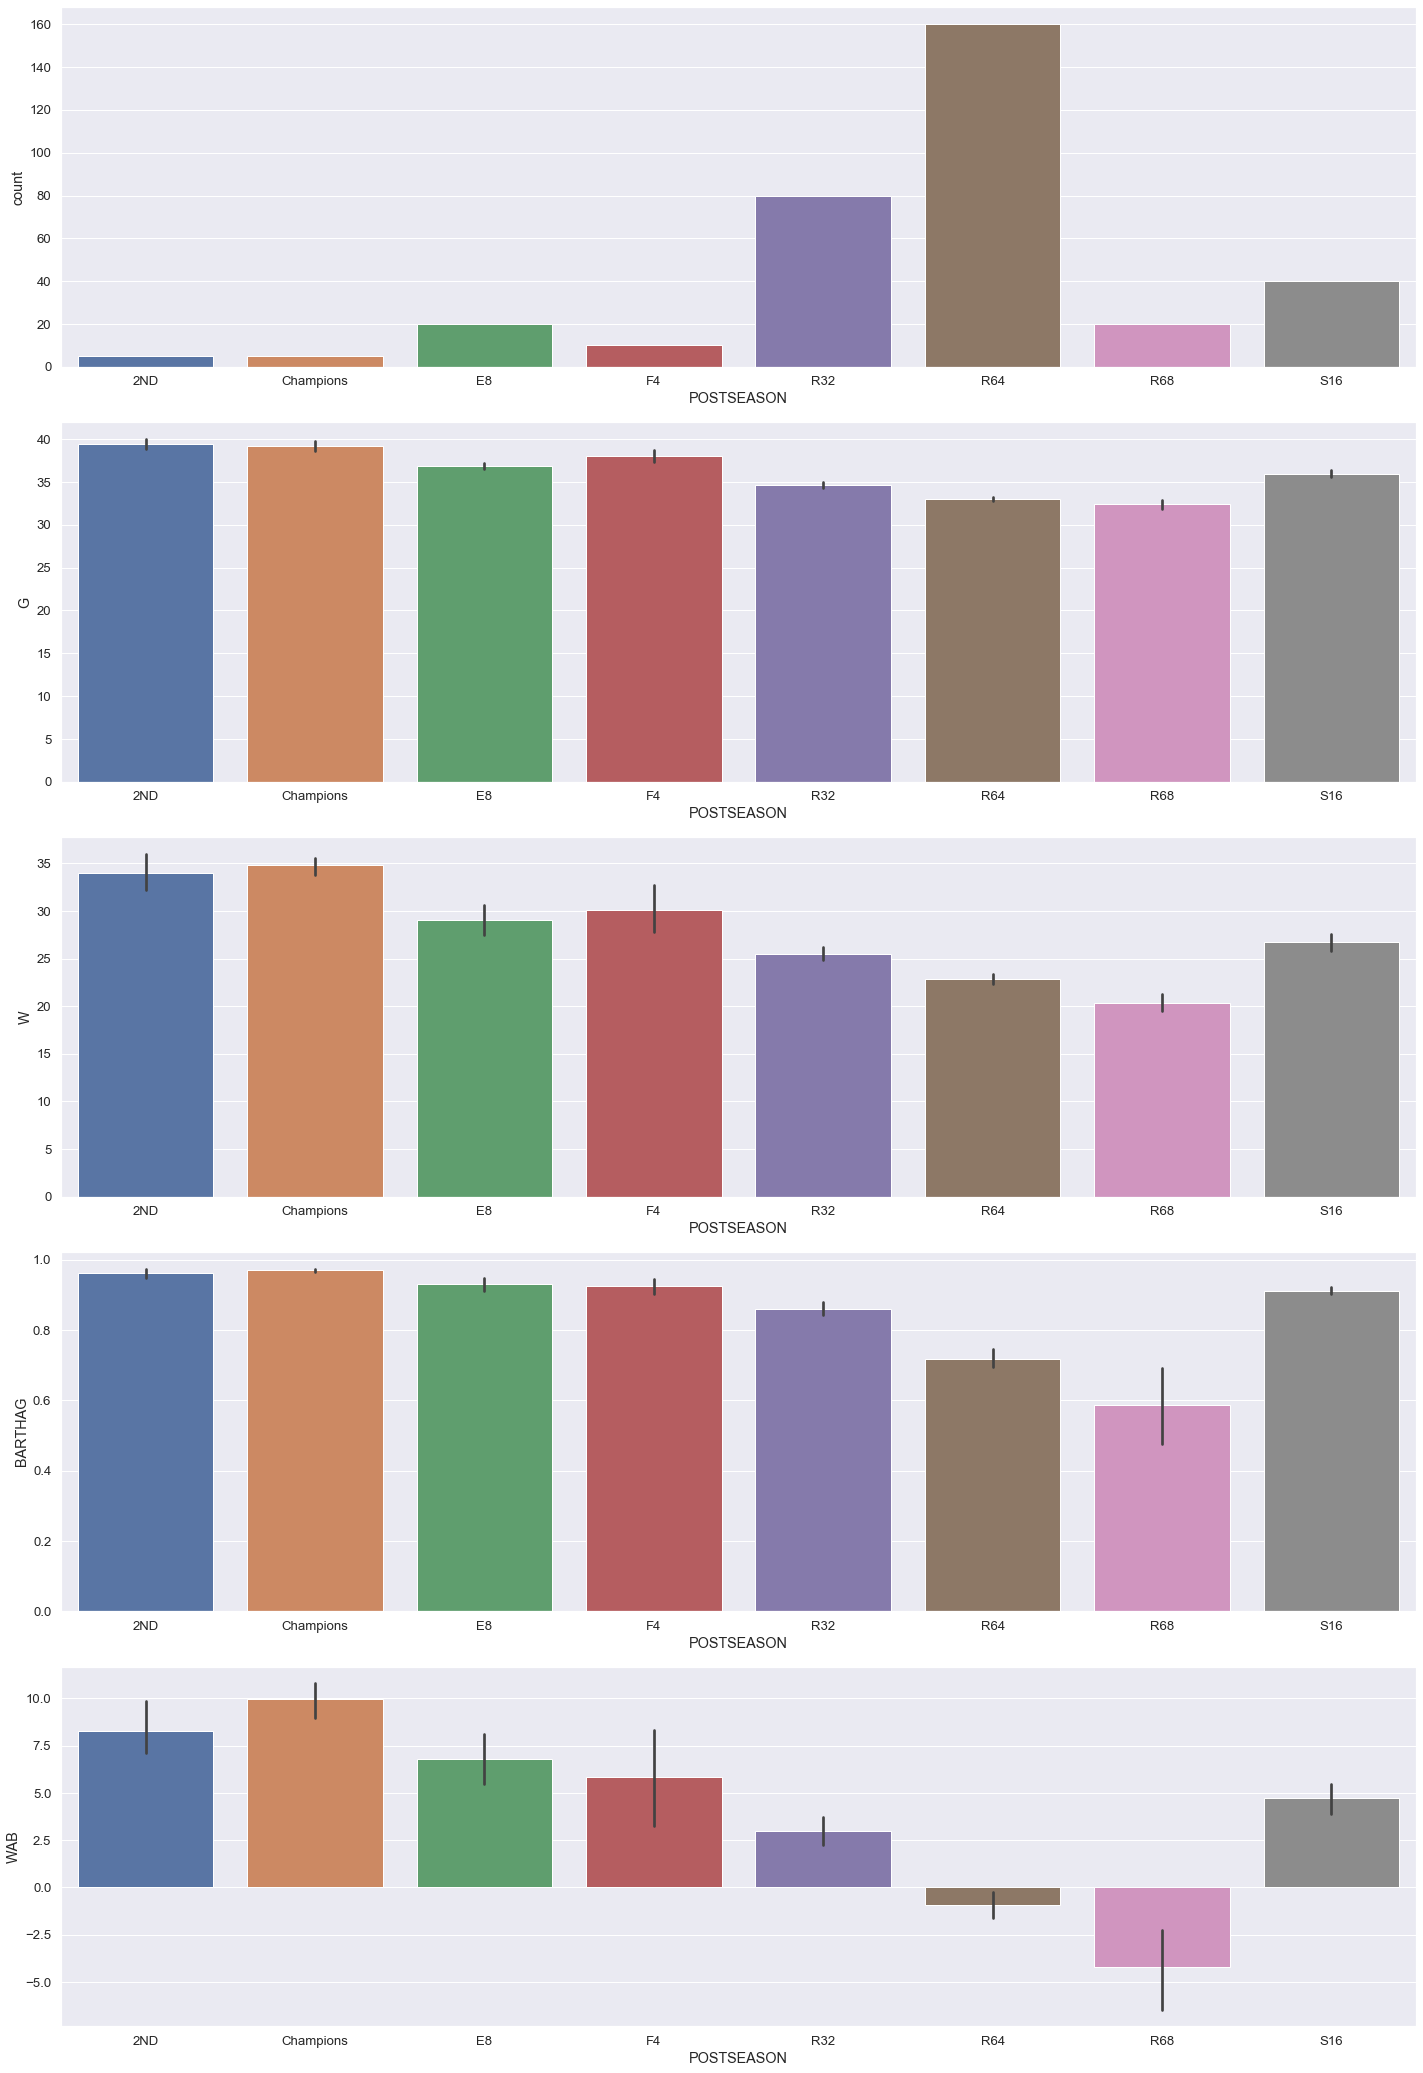

In [12]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,1,1)
sns.countplot(df.POSTSEASON)

plt.subplot(7,1,2)
sns.barplot(x=df.POSTSEASON, y=df.G)

plt.subplot(7,1,3)
sns.barplot(x=df.POSTSEASON, y=df.W)

plt.subplot(7,1,4)
sns.barplot(x=df.POSTSEASON, y=df.BARTHAG)

plt.subplot(7,1,5)
sns.barplot(x=df.POSTSEASON, y=df.WAB)

plt.tight_layout()
plt.show()

In [13]:
df.corr()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,YEAR
G,1.000000,0.708838,0.613432,-0.606166,0.688059,0.346425,-0.481942,-0.336407,0.065020,0.261046,-0.184134,0.090549,-0.279593,0.339290,-0.439340,0.225821,-0.349726,-0.040433,0.666595,-0.607807,0.052233
W,0.708838,1.000000,0.754532,-0.690753,0.814512,0.617839,-0.609144,-0.467073,0.138805,0.296395,-0.366715,0.126931,-0.329245,0.585806,-0.529558,0.432743,-0.485485,-0.016057,0.905029,-0.612284,0.091829
ADJOE,0.613432,0.754532,1.000000,-0.528576,0.870686,0.732683,-0.333693,-0.601024,-0.116231,0.261351,-0.266665,0.063637,-0.382290,0.646011,-0.328822,0.579193,-0.198275,0.070476,0.851663,-0.791692,0.048861
ADJDE,-0.606166,-0.690753,-0.528576,1.000000,-0.852432,-0.221381,0.792320,0.219779,-0.234615,-0.294066,0.347646,-0.125265,0.180823,-0.251354,0.728488,-0.102715,0.564135,0.227852,-0.809486,0.706046,0.055367
BARTHAG,0.688059,0.814512,0.870686,-0.852432,1.000000,0.543153,-0.627696,-0.472329,0.054377,0.310917,-0.337804,0.112072,-0.327932,0.512045,-0.588121,0.386597,-0.427750,-0.079611,0.941776,-0.832709,0.000228
EFG_O,0.346425,0.617839,0.732683,-0.221381,0.543153,1.000000,-0.120335,-0.367975,-0.144287,-0.147990,-0.319901,-0.083514,-0.404445,0.893530,-0.104079,0.763028,-0.100545,0.120142,0.562904,-0.275137,0.196195
EFG_D,-0.481942,-0.609144,-0.333693,0.792320,-0.627696,-0.120335,1.000000,0.101070,-0.020831,-0.341636,0.172261,-0.205807,0.107161,-0.148439,0.907933,-0.043770,0.722404,0.273412,-0.629864,0.386928,0.211657
TOR,-0.336407,-0.467073,-0.601024,0.219779,-0.472329,-0.367975,0.101070,1.000000,0.103437,0.134433,0.188585,0.161369,0.316898,-0.288945,0.091686,-0.333397,0.066363,-0.102687,-0.470286,0.291587,-0.054840
TORD,0.065020,0.138805,-0.116231,-0.234615,0.054377,-0.144287,-0.020831,0.103437,1.000000,0.118496,0.289078,0.111844,0.392412,-0.079076,0.027203,-0.177276,-0.106798,-0.065216,0.094765,0.057411,-0.051754
ORB,0.261046,0.296395,0.261351,-0.294066,0.310917,-0.147990,-0.341636,0.134433,0.118496,1.000000,0.018964,0.280598,0.136233,-0.091259,-0.341291,-0.143735,-0.197189,-0.105308,0.332275,-0.314659,-0.217610


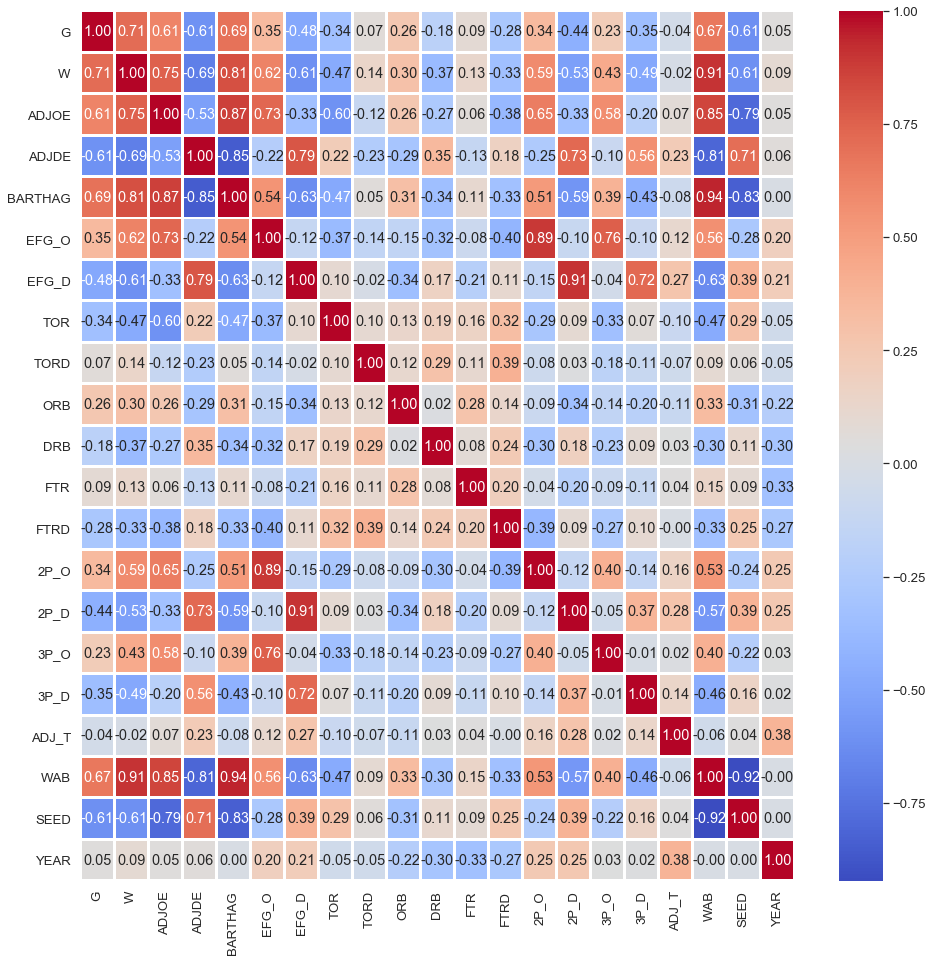

In [14]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

### Data Preprocessing

### Treat Missing Values

In [15]:
df.isnull().sum()

TEAM             0
CONF             0
G                0
W                0
ADJOE            0
ADJDE            0
BARTHAG          0
EFG_O            0
EFG_D            0
TOR              0
TORD             0
ORB              0
DRB              0
FTR              0
FTRD             0
2P_O             0
2P_D             0
3P_O             0
3P_D             0
ADJ_T            0
WAB              0
POSTSEASON    1417
SEED          1417
YEAR             0
dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum()

TEAM          0
CONF          0
G             0
W             0
ADJOE         0
ADJDE         0
BARTHAG       0
EFG_O         0
EFG_D         0
TOR           0
TORD          0
ORB           0
DRB           0
FTR           0
FTRD          0
2P_O          0
2P_D          0
3P_O          0
3P_D          0
ADJ_T         0
WAB           0
POSTSEASON    0
SEED          0
YEAR          0
dtype: int64

In [18]:
df.reset_index(drop=True, inplace=True)

In [19]:
df

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,20.6,28.2,29.4,34.1,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,32.1,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,25.2,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,27.9,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,UCLA,P12,36,22,111.8,96.6,0.8425,49.6,48.5,17.6,17.9,33.8,28.6,35.7,32.3,47.4,45.4,36.8,35.6,66.8,0.0,S16,11.0,2015
336,Utah,P12,34,25,114.9,88.7,0.9513,55.2,43.0,18.2,18.3,31.3,28.4,43.4,34.3,52.3,41.4,40.1,31.2,61.4,3.7,S16,5.0,2015
337,West Virginia,B12,35,25,110.3,93.3,0.8733,46.1,52.7,18.7,28.0,40.1,31.1,40.4,55.5,45.5,51.8,31.6,36.5,68.6,4.1,S16,5.0,2015
338,Wichita St.,MVC,34,29,114.3,91.5,0.9277,50.3,45.8,15.0,21.3,34.5,27.4,36.2,36.6,48.9,42.6,35.4,35.3,62.6,4.2,S16,7.0,2015


### Treat Duplicate Values

In [20]:
df.duplicated(keep='first').sum()

0

### Drop unwanted features

In [21]:
df.columns

Index(['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'POSTSEASON', 'SEED', 'YEAR'],
      dtype='object')

In [22]:
df.drop(['TEAM', 'CONF', 'SEED', 'YEAR'],axis=1,inplace=True)

In [23]:
df

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON
0,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND
1,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,20.6,28.2,29.4,34.1,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions
2,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,32.1,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8
3,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,25.2,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8
4,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,27.9,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,36,22,111.8,96.6,0.8425,49.6,48.5,17.6,17.9,33.8,28.6,35.7,32.3,47.4,45.4,36.8,35.6,66.8,0.0,S16
336,34,25,114.9,88.7,0.9513,55.2,43.0,18.2,18.3,31.3,28.4,43.4,34.3,52.3,41.4,40.1,31.2,61.4,3.7,S16
337,35,25,110.3,93.3,0.8733,46.1,52.7,18.7,28.0,40.1,31.1,40.4,55.5,45.5,51.8,31.6,36.5,68.6,4.1,S16
338,34,29,114.3,91.5,0.9277,50.3,45.8,15.0,21.3,34.5,27.4,36.2,36.6,48.9,42.6,35.4,35.3,62.6,4.2,S16


In [24]:
df["POSTSEASON"].value_counts()

R64          160
R32           80
S16           40
R68           20
E8            20
F4            10
Champions      5
2ND            5
Name: POSTSEASON, dtype: int64

### Narrow down for teams qualified from Round 32 onwards

In [25]:
df1 = df[df['POSTSEASON'].str.contains('Champions|2ND|F4|S16|E8|R32', na=False)]

In [26]:
df1

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON
0,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND
1,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,20.6,28.2,29.4,34.1,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions
2,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,32.1,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8
3,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,25.2,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8
4,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,27.9,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,36,22,111.8,96.6,0.8425,49.6,48.5,17.6,17.9,33.8,28.6,35.7,32.3,47.4,45.4,36.8,35.6,66.8,0.0,S16
336,34,25,114.9,88.7,0.9513,55.2,43.0,18.2,18.3,31.3,28.4,43.4,34.3,52.3,41.4,40.1,31.2,61.4,3.7,S16
337,35,25,110.3,93.3,0.8733,46.1,52.7,18.7,28.0,40.1,31.1,40.4,55.5,45.5,51.8,31.6,36.5,68.6,4.1,S16
338,34,29,114.3,91.5,0.9277,50.3,45.8,15.0,21.3,34.5,27.4,36.2,36.6,48.9,42.6,35.4,35.3,62.6,4.2,S16


In [27]:
df1.reset_index(drop=True, inplace=True)

In [28]:
df1

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON
0,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND
1,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,20.6,28.2,29.4,34.1,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions
2,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,32.1,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8
3,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,25.2,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8
4,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,27.9,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,36,22,111.8,96.6,0.8425,49.6,48.5,17.6,17.9,33.8,28.6,35.7,32.3,47.4,45.4,36.8,35.6,66.8,0.0,S16
156,34,25,114.9,88.7,0.9513,55.2,43.0,18.2,18.3,31.3,28.4,43.4,34.3,52.3,41.4,40.1,31.2,61.4,3.7,S16
157,35,25,110.3,93.3,0.8733,46.1,52.7,18.7,28.0,40.1,31.1,40.4,55.5,45.5,51.8,31.6,36.5,68.6,4.1,S16
158,34,29,114.3,91.5,0.9277,50.3,45.8,15.0,21.3,34.5,27.4,36.2,36.6,48.9,42.6,35.4,35.3,62.6,4.2,S16


### Focusing on teams winning F4 to Champions

In [29]:
df1["POSTSEASON"] = df1["POSTSEASON"].replace(to_replace=["2ND","Champions","F4"], value=1)

In [30]:
df1["POSTSEASON"] = df1["POSTSEASON"].replace(to_replace=["E8","S16","R32"], value=0)

In [31]:
df1

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON
0,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,1
1,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,20.6,28.2,29.4,34.1,30.0,57.4,44.1,36.2,33.9,66.7,8.9,1
2,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,32.1,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,0
3,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,25.2,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,0
4,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,27.9,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,36,22,111.8,96.6,0.8425,49.6,48.5,17.6,17.9,33.8,28.6,35.7,32.3,47.4,45.4,36.8,35.6,66.8,0.0,0
156,34,25,114.9,88.7,0.9513,55.2,43.0,18.2,18.3,31.3,28.4,43.4,34.3,52.3,41.4,40.1,31.2,61.4,3.7,0
157,35,25,110.3,93.3,0.8733,46.1,52.7,18.7,28.0,40.1,31.1,40.4,55.5,45.5,51.8,31.6,36.5,68.6,4.1,0
158,34,29,114.3,91.5,0.9277,50.3,45.8,15.0,21.3,34.5,27.4,36.2,36.6,48.9,42.6,35.4,35.3,62.6,4.2,0


In [32]:
df1["POSTSEASON"].value_counts()

0    140
1     20
Name: POSTSEASON, dtype: int64

### Create and save processed dataset

In [33]:
#df1.to_csv("train2.csv",index=False)

### Model Training (PyCaret)

### Using PyCaret

In [34]:
df = pd.read_csv("train2.csv")

In [35]:
df

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON
0,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,1
1,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,20.6,28.2,29.4,34.1,30.0,57.4,44.1,36.2,33.9,66.7,8.9,1
2,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,32.1,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,0
3,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,25.2,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,0
4,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,27.9,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,36,22,111.8,96.6,0.8425,49.6,48.5,17.6,17.9,33.8,28.6,35.7,32.3,47.4,45.4,36.8,35.6,66.8,0.0,0
156,34,25,114.9,88.7,0.9513,55.2,43.0,18.2,18.3,31.3,28.4,43.4,34.3,52.3,41.4,40.1,31.2,61.4,3.7,0
157,35,25,110.3,93.3,0.8733,46.1,52.7,18.7,28.0,40.1,31.1,40.4,55.5,45.5,51.8,31.6,36.5,68.6,4.1,0
158,34,29,114.3,91.5,0.9277,50.3,45.8,15.0,21.3,34.5,27.4,36.2,36.6,48.9,42.6,35.4,35.3,62.6,4.2,0


In [36]:
exp_class = setup(data = df, target = 'POSTSEASON', session_id=123, normalize=True, 
                  train_size=0.8, numeric_features=['G','W']) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(160, 20)"
4,Missing Values,False
5,Numeric Features,19
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [37]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.976900,0.977300,0.900000,0.966700,0.913300,0.901200
1,CatBoost Classifier,0.976900,0.950000,0.800000,0.900000,0.833300,0.825700
2,SVM - Linear Kernel,0.969200,0.000000,0.900000,0.900000,0.900000,0.881800
3,Gradient Boosting Classifier,0.969200,0.886700,0.800000,0.866700,0.813300,0.801200
4,Extreme Gradient Boosting,0.969200,0.954500,0.800000,0.866700,0.813300,0.801200
5,Random Forest Classifier,0.961500,0.961700,0.700000,0.800000,0.733300,0.725700
6,Linear Discriminant Analysis,0.961500,0.990900,0.850000,0.916700,0.863300,0.842100
7,Decision Tree Classifier,0.960900,0.890900,0.800000,0.816700,0.780000,0.763700
8,Ridge Classifier,0.946200,0.000000,0.650000,0.700000,0.666700,0.662900
9,Ada Boost Classifier,0.945500,0.950000,0.700000,0.800000,0.716700,0.692000


### Train Test Split

In [38]:
df.shape

(160, 20)

In [39]:
X = df.iloc[:,0:19]
y = df.iloc[:,19]

In [40]:
X

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB
0,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6
1,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,20.6,28.2,29.4,34.1,30.0,57.4,44.1,36.2,33.9,66.7,8.9
2,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,32.1,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3
3,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,25.2,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6
4,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,27.9,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,36,22,111.8,96.6,0.8425,49.6,48.5,17.6,17.9,33.8,28.6,35.7,32.3,47.4,45.4,36.8,35.6,66.8,0.0
156,34,25,114.9,88.7,0.9513,55.2,43.0,18.2,18.3,31.3,28.4,43.4,34.3,52.3,41.4,40.1,31.2,61.4,3.7
157,35,25,110.3,93.3,0.8733,46.1,52.7,18.7,28.0,40.1,31.1,40.4,55.5,45.5,51.8,31.6,36.5,68.6,4.1
158,34,29,114.3,91.5,0.9277,50.3,45.8,15.0,21.3,34.5,27.4,36.2,36.6,48.9,42.6,35.4,35.3,62.6,4.2


In [41]:
y

0      1
1      1
2      0
3      0
4      0
      ..
155    0
156    0
157    0
158    0
159    0
Name: POSTSEASON, Length: 160, dtype: int64

In [42]:
X.values, y.values

(array([[ 40. ,  33. , 123.3, ...,  36.2,  71.7,   8.6],
        [ 40. ,  35. , 123.1, ...,  33.9,  66.7,   8.9],
        [ 36. ,  24. , 118.3, ...,  36.9,  65.5,   2.3],
        ...,
        [ 35. ,  25. , 110.3, ...,  36.5,  68.6,   4.1],
        [ 34. ,  29. , 114.3, ...,  35.3,  62.6,   4.2],
        [ 37. ,  23. , 115.7, ...,  34.6,  65.5,   1.3]]),
 array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0], dtype=int64))

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((128, 19), (32, 19), (128,), (32,))

### Feature Scaling

In [45]:
X_train

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB
149,35,19,102.7,100.1,0.5721,47.6,47.6,20.1,19.7,34.2,33.1,35.7,33.6,46.6,47.4,33.2,31.9,65.3,-7.5
135,39,27,116.3,92.6,0.9327,53.2,44.9,17.5,16.5,33.5,27.0,32.7,39.0,50.8,43.8,38.5,31.5,63.9,3.0
142,34,22,114.0,92.0,0.9211,48.1,45.6,17.1,18.9,35.6,30.3,38.0,29.1,47.3,43.7,33.3,32.6,64.6,2.1
7,37,29,118.2,94.1,0.9326,54.3,47.2,18.3,17.7,31.2,30.5,33.0,28.3,48.2,45.3,42.2,33.7,70.8,8.0
148,35,26,103.1,87.5,0.8691,46.6,43.5,18.6,21.1,35.7,29.7,36.2,25.7,45.9,42.3,32.0,30.6,61.2,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,29,22,109.1,95.6,0.8209,52.2,46.7,19.9,17.8,39.3,24.3,41.7,33.3,51.4,45.5,36.0,32.7,66.8,-0.1
98,38,32,118.9,89.2,0.9646,53.6,45.0,17.5,19.4,35.6,29.5,33.2,24.0,58.0,45.0,30.8,29.9,73.6,11.2
66,37,29,122.3,92.9,0.9592,55.9,46.4,17.5,17.3,38.8,30.0,34.6,22.3,56.0,45.4,37.2,32.0,70.9,6.6
126,35,28,117.9,96.6,0.9081,51.2,49.9,17.9,20.1,36.7,30.8,37.1,33.1,52.9,49.4,31.9,33.7,71.2,7.3


In [46]:
scaler = StandardScaler()

In [47]:
X_train_scaled = scaler.fit_transform(X_train)

In [48]:
X_test_scaled = scaler.transform(X_test)

In [49]:
X_train_scaled

array([[-0.39036024, -2.03590303, -2.33818755, ..., -0.48174631,
        -0.70152049, -3.15604178],
       [ 1.75871981, -0.0079218 ,  0.22983572, ..., -0.67828345,
        -1.11778695, -0.35936468],
       [-0.92763026, -1.27541007, -0.20446233, ..., -0.13780632,
        -0.90965372, -0.59907986],
       ...,
       [ 0.68417978,  0.49907351,  1.36278717, ..., -0.43261203,
         0.96354536,  0.59949604],
       [-0.39036024,  0.24557585,  0.53195611, ...,  0.40267082,
         1.05274532,  0.78594118],
       [-0.92763026, -1.78240538, -0.09116719, ...,  0.7957451 ,
        -0.31498735, -0.9187001 ]])

In [50]:
X_test_scaled

array([[-9.27630257e-01, -1.02191242e+00, -1.24300116e+00,
        -1.48562594e+00,  2.50569737e-01, -1.67371623e+00,
        -2.05728365e-01, -4.33305734e-03,  2.28799747e-01,
         7.02687843e-01, -1.15517218e+00,  1.35167440e+00,
         2.95501751e-01, -1.87075401e+00,  3.96655811e-01,
        -2.98823454e-01, -1.07135774e+00, -1.11778695e+00,
        -2.26189584e-01],
       [-3.90360244e-01,  2.45575852e-01, -9.21998247e-01,
        -3.44322574e-02, -4.23305446e-01, -6.54586265e-01,
        -7.35039534e-01,  1.16655533e+00, -8.22037158e-01,
        -7.67648839e-01,  7.19236899e-01,  2.18002973e+00,
        -6.32592637e-01, -1.32536806e+00, -6.84364994e-01,
         5.03892226e-01, -5.30880598e-01, -9.39387040e-01,
         6.79401095e-01],
       [ 1.46909769e-01,  1.00606881e+00, -1.48847397e+00,
         9.33030196e-01, -2.00066248e+00, -6.18188766e-01,
        -1.35256923e+00,  3.03795464e-01, -1.05047996e+00,
         4.49181519e-01, -5.42384600e-01, -1.35727140e+00,
    

In [51]:
y_train

149    0
135    1
142    0
7      1
148    0
      ..
17     0
98     0
66     0
126    0
109    0
Name: POSTSEASON, Length: 128, dtype: int64

In [52]:
y_test

137    0
144    0
114    0
90     0
31     0
93     0
87     0
134    1
23     0
28     0
107    0
53     0
33     1
91     0
65     1
82     0
60     0
130    0
8      0
42     0
79     0
37     0
20     0
36     0
13     0
62     0
24     0
146    0
41     0
61     0
145    0
140    0
Name: POSTSEASON, dtype: int64

Now, it is your turn, use the training set to build an accurate model. Then use the validation set to report the accuracy of the model You should use the following algorithm:

* K Nearest Neighbor(KNN)
* Decision Tree
* Support Vector Machine
* Logistic Regression



### K Nearest Neighbor (KNN)

### Question 1 Build a KNN model using a value of k equals five, find the accuracy on the validation data (X_val and y_val)

In [53]:
knn = KNeighborsClassifier(n_neighbors=5)

In [54]:
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [55]:
knnpred = knn.predict(X_test_scaled)

In [56]:
accuracy_score(y_test,knnpred)

0.9375

In [57]:
f1_score(y_test,knnpred)

0.5

In [58]:
jaccard_score(y_test,knnpred)

0.3333333333333333

In [59]:
print(classification_report(y_test,knnpred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        29
           1       1.00      0.33      0.50         3

    accuracy                           0.94        32
   macro avg       0.97      0.67      0.73        32
weighted avg       0.94      0.94      0.92        32



### Question 2 Determine and print the accuracy for the first 15 values of k the on the validation data:

In [60]:
# try K=1 through K=15 and record testing accuracy
k_range = range(1, 15)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 15
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    y_pred = knn.predict(X_test_scaled)
    scores.append(accuracy_score(y_test, y_pred))

print(scores)

[0.90625, 0.90625, 0.875, 0.90625, 0.9375, 0.9375, 0.9375, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625, 0.90625]


### Decision Tree

### Question 3 Determine the minimum value for the parameter max_depth that improves results 

In [61]:
tree = DecisionTreeClassifier(random_state=123)

In [62]:
parameters = {'max_depth': np.arange(1,20,1)}

In [63]:
randtree = RandomizedSearchCV(estimator=tree, param_distributions = parameters, cv = 5, n_iter = 50, 
                           n_jobs=-1, scoring='accuracy',random_state=123)

In [64]:
randtree.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=123,
           

In [65]:
randtree.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [66]:
randtree.best_params_

{'max_depth': 1}

In [67]:
randtree.best_score_

0.9452307692307693

In [68]:
treepred = randtree.predict(X_test_scaled)

In [69]:
accuracy_score(y_test,treepred)

1.0

In [70]:
f1_score(y_test,treepred)

1.0

In [71]:
jaccard_score(y_test,treepred)

1.0

In [72]:
print(classification_report(y_test,treepred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00         3

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



### Support Vector Machine

### Question 4 Train the support vector machine model and determine the accuracy on the validation data for each kernel. Find the kernel (linear, poly, rbf, sigmoid) that provides the best score on the validation data and train a SVM using it.

### Linear

In [73]:
svm1 = SVC(kernel='linear',random_state=123)

In [74]:
svm1.fit(X_train_scaled,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=123, shrinking=True, tol=0.001,
    verbose=False)

In [75]:
svm_pred1 = svm1.predict(X_test_scaled)

In [76]:
accuracy_score(y_test,svm_pred1)

1.0

In [77]:
f1_score(y_test,svm_pred1)

1.0

In [78]:
jaccard_score(y_test,svm_pred1)

1.0

In [79]:
print(classification_report(y_test,svm_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00         3

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



### Poly

In [80]:
svm2 = SVC(kernel='poly',random_state=123)

In [81]:
svm2.fit(X_train_scaled,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=123, shrinking=True, tol=0.001,
    verbose=False)

In [82]:
svm_pred2 = svm2.predict(X_test_scaled)

In [83]:
accuracy_score(y_test,svm_pred2)

0.96875

In [84]:
print(classification_report(y_test,svm_pred2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.67      0.80         3

    accuracy                           0.97        32
   macro avg       0.98      0.83      0.89        32
weighted avg       0.97      0.97      0.97        32



### RBF

In [85]:
svm3 = SVC(kernel='rbf',random_state=123)

In [86]:
svm3.fit(X_train_scaled,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=123, shrinking=True, tol=0.001,
    verbose=False)

In [87]:
svm_pred3 = svm3.predict(X_test_scaled)

In [88]:
accuracy_score(y_test,svm_pred3)

0.90625

In [89]:
print(classification_report(y_test,svm_pred3))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        29
           1       0.00      0.00      0.00         3

    accuracy                           0.91        32
   macro avg       0.45      0.50      0.48        32
weighted avg       0.82      0.91      0.86        32



### Sigmoid

In [90]:
svm4 = SVC(kernel='sigmoid',random_state=123)

In [91]:
svm4.fit(X_train_scaled,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=123, shrinking=True, tol=0.001,
    verbose=False)

In [92]:
svm_pred4 = svm4.predict(X_test_scaled)

In [93]:
accuracy_score(y_test,svm_pred4)

0.96875

In [94]:
print(classification_report(y_test,svm_pred4))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.67      0.80         3

    accuracy                           0.97        32
   macro avg       0.98      0.83      0.89        32
weighted avg       0.97      0.97      0.97        32



### Logistic Regression

### Question 5 Train a logistic regression model and determine the accuracy of the validation data (set C =0.01)

In [95]:
lrmodel = LogisticRegression(C=0.01,random_state=123)

In [96]:
lrmodel.fit(X_train_scaled,y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
y_pred = lrmodel.predict(X_test_scaled)

In [98]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [99]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[29,  0],
       [ 3,  0]], dtype=int64)

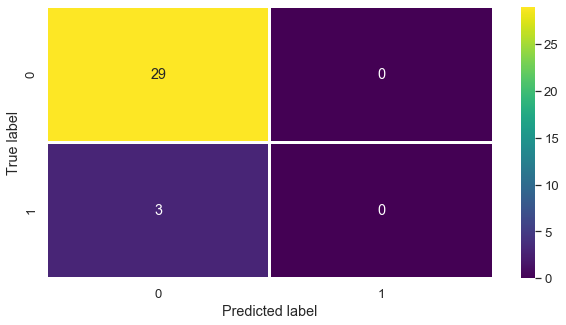

In [100]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt='.4g',linewidths=2, cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [101]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        29
           1       0.00      0.00      0.00         3

    accuracy                           0.91        32
   macro avg       0.45      0.50      0.48        32
weighted avg       0.82      0.91      0.86        32



In [102]:
accuracy_score(y_test, y_pred)

0.90625

In [103]:
f1_score(y_test,y_pred)

0.0

In [104]:
jaccard_score(y_test,y_pred)

0.0

### Cross Validation

In [105]:
cv = cross_validate(lrmodel,X,y,scoring='accuracy',cv=10,verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


In [106]:
cv

{'fit_time': array([0.03768682, 0.01562095, 0.03124213, 0.03124213, 0.02216625,
        0.01565242, 0.01561522, 0.01559663, 0.01562452, 0.0377841 ]),
 'score_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'test_score': array([0.9375, 0.875 , 0.9375, 0.875 , 0.9375, 0.875 , 0.9375, 0.8125,
        0.875 , 0.9375])}

### Model Evaluation using Test set

### Question 5 Calculate the F1 score and Jaccard Similarity score for each model from above. Use the Hyperparameter that performed best on the validation data. For f1_score please set the average parameter to 'micro'.

### Using RandomSearchCV

In [107]:
modelrs = LogisticRegression(random_state=123,n_jobs=-1)

In [108]:
parameters = {'C': np.arange(0.1,2.00,0.1),
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             }

In [109]:
randm = RandomizedSearchCV(estimator=modelrs, param_distributions = parameters, cv = 5, n_iter = 50, 
                           n_jobs=-1, scoring='accuracy')

In [110]:
randm.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=-1,
                                                penalty='l2', random_state=123,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=50, n_jobs=-1,
                   param_distributions={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'libli

In [111]:
randm.best_estimator_

LogisticRegression(C=1.3000000000000003, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=123, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
randm.best_score_

0.9606153846153846

In [113]:
randm.best_params_

{'solver': 'liblinear', 'C': 1.3000000000000003}

### Final Model

In [114]:
lrfinal = LogisticRegression(C=1.30,solver='liblinear',random_state=123,n_jobs=-1)

In [115]:
lrfinal.fit(X_train_scaled,y_train)

LogisticRegression(C=1.3, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=123, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [116]:
y_pred3 = lrfinal.predict(X_test_scaled)

In [117]:
y_pred3

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [118]:
cm = confusion_matrix(y_test,y_pred3)
cm

array([[29,  0],
       [ 0,  3]], dtype=int64)

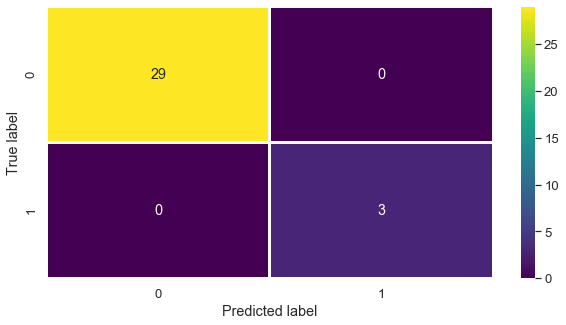

In [119]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt='.4g',linewidths=2, cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [120]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00         3

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



In [121]:
accuracy_score(y_test,y_pred3)

1.0

In [122]:
f1_score(y_test,y_pred3)

1.0

In [123]:
jaccard_score(y_test,y_pred3)

1.0

In [124]:
y_pred4 = lrfinal.predict_proba(X_test_scaled)

In [125]:
log_loss(y_test,y_pred4)

0.09959587820427168

# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Accuracy | Jaccard  | F1-score  | LogLoss |
|--------------------|----------|----------|-----------|---------|
| KNN                |0.628571  | 0.458333 | 0.628571  | NA      |
| Decision Tree      |0.642857  | 0.473684 | 0.642857  | NA      |
| SVM                |0.685714  | 0.521739 | 0.685714  | NA      |
| LogisticRegression |0.685714  | 0.521739 | 0.685714  | 1.03719 |

Something to keep in mind when creating models to predict the results of basketball tournaments or sports in general is that is quite hard due to so many factors influencing the game. Even in sports betting an accuracy of 55% and over is considered good as it indicates profits.